# Peruvian Ministers Network (2005-2023)

This project focuses on mapping the network of Peruvian ministers from Alan García’s second administration (2005) to Dina Boluarte’s government in 2023. It analyzes two key variables: the university from which each minister graduated and their region of origin. The repository contains all the relevant data and code for calculating and visualizing the network, with a final summary highlighting the most significant findings.

**Warning:** This is primarily a code exercise. The data was AI-generated and has not been fully fact-checked, so it may contain inaccuracies.

## 1. Data details: AI-generated peruvian ministers network

In [2]:
import pandas as pd

In [47]:
min_net_FULL = pd.read_excel('networks_minister.xlsx') 

In [48]:
min_net_FULL.head()

,Nombre,Ministerio,Presidente,U_Pregrado,Región_Procedencia
0,Salomón Lerner Ghitis,PCM,Ollanta Humala,Pontificia Universidad Católica del Perú,Lima
1,Óscar Valdés Dancuart,PCM,Ollanta Humala,Escuela Militar de Chorrillos,Tacna
2,Juan Jiménez Mayor,PCM,Ollanta Humala,Pontificia Universidad Católica del Perú,Lima
3,César Villanueva Arévalo,PCM,Ollanta Humala,Universidad Nacional Mayor de San Marcos,San Martín
4,René Cornejo Díaz,PCM,Ollanta Humala,Universidad Nacional de Ingeniería,Arequipa


In [51]:
# Check the column names to ensure they match what we expect
print(min_net_FULL.columns)

Index(['Nombre', 'Ministerio', 'Presidente', 'U_Pregrado',
       'Región_Procedencia'],
      dtype='object')


In [50]:
min_net_FULL['Presidente'].unique()

array(['Ollanta Humala', 'Pedro Castillo'], dtype=object)

## 2. Creating our firsts nets

For practice purposes, we'll focus on the first half of the dataset first, specifically the information from Ollanta Humala's government.

In [52]:
# Create min_net by dropping all rows where 'Presidente' is 'Pedro Castillo'
min_net = min_net_FULL[min_net_FULL['Presidente'] != 'Pedro Castillo'].copy()

### 2.1. Simple Network: Connections Based on Undergraduate University

This first version uses only two variables: Nombre (name) and U_Pregrado (undergraduate university), where the nodes represent the ministers and the edges indicate shared undergraduate universities.

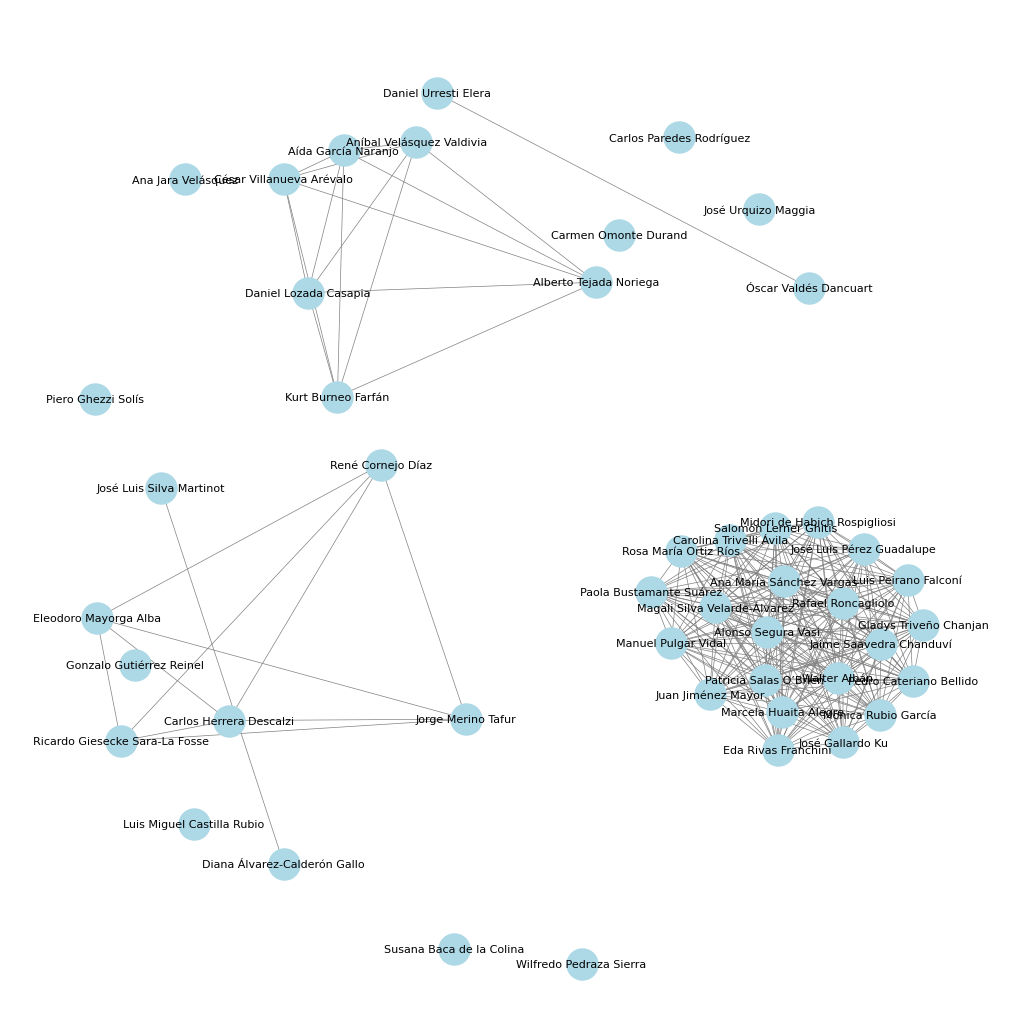

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    
    # Add the minister as a node with university as an attribute
    G.add_node(minister, university=university)
    
# Create edges based on shared universities
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['U_Pregrado'] == row2['U_Pregrado']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Draw the graph with improved layout
plt.figure(figsize=(10, 10))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, edge_color='gray', width=0.5)

plt.show()

### 2.2 Colored Network: Ministers by Undergraduate University and Ministry

Now we add some color using a third variable: Ministerio (ministry)

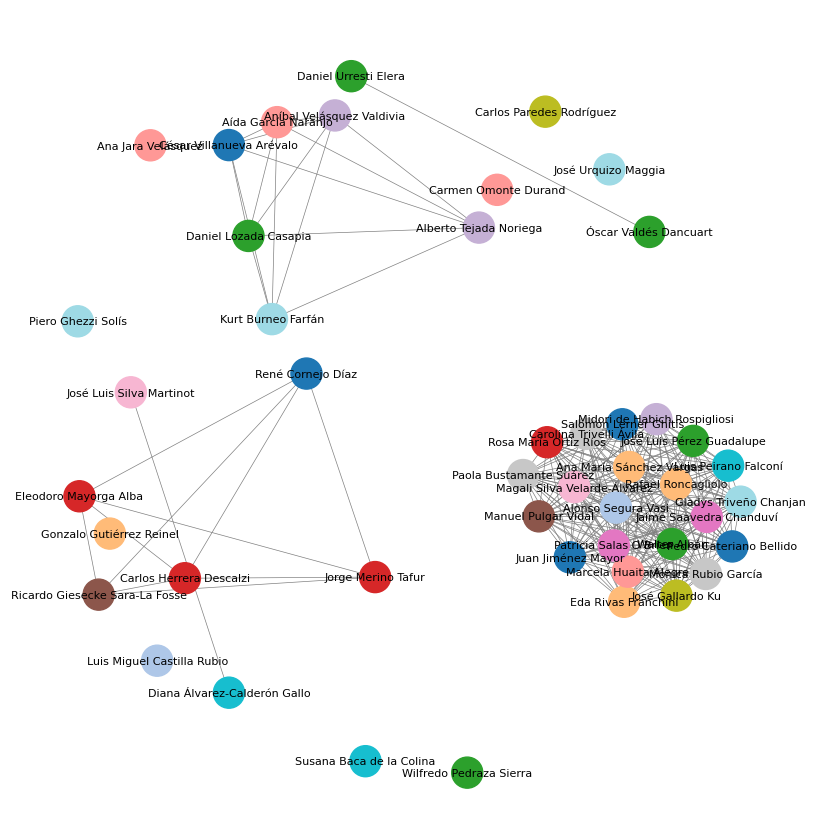

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    ministry = row['Ministerio']
    
    # Add the minister as a node with university and ministry as attributes
    G.add_node(minister, university=university, ministry=ministry)
    
# Create edges based on shared universities
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['U_Pregrado'] == row2['U_Pregrado']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Generate a dynamic color map for ministries
unique_ministries = min_net['Ministerio'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_ministries))  # Use a colormap with enough distinct colors
color_map = dict(zip(unique_ministries, [colors(i) for i in range(len(unique_ministries))]))

# Create a color list for the nodes based on their ministry
node_colors = [color_map[G.nodes[node]['ministry']] for node in G.nodes]

# Draw the graph with improved layout
plt.figure(figsize=(8, 8))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, edge_color='gray', width=0.5)

plt.show()

Now we add some atributtes

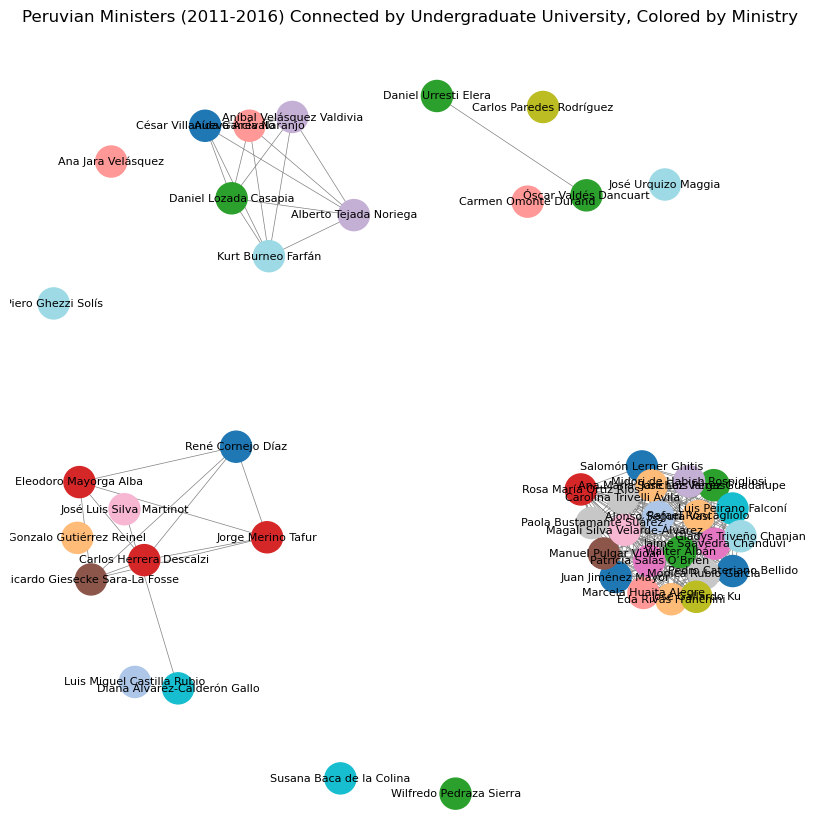

In [42]:
# Draw the graph with improved layout
plt.figure(figsize=(8, 8))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=0.7, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, edge_color='gray', width=0.5)

plt.title("Peruvian Ministers (2011-2016) Connected by Undergraduate University, Colored by Ministry")
plt.show()

Ahora Pedro Castillo

In [53]:
# Create min_net by dropping all rows where 'Presidente' is 'Pedro Castillo'
min_net = min_net_FULL[min_net_FULL['Presidente'] != 'Ollanta Humala'].copy()

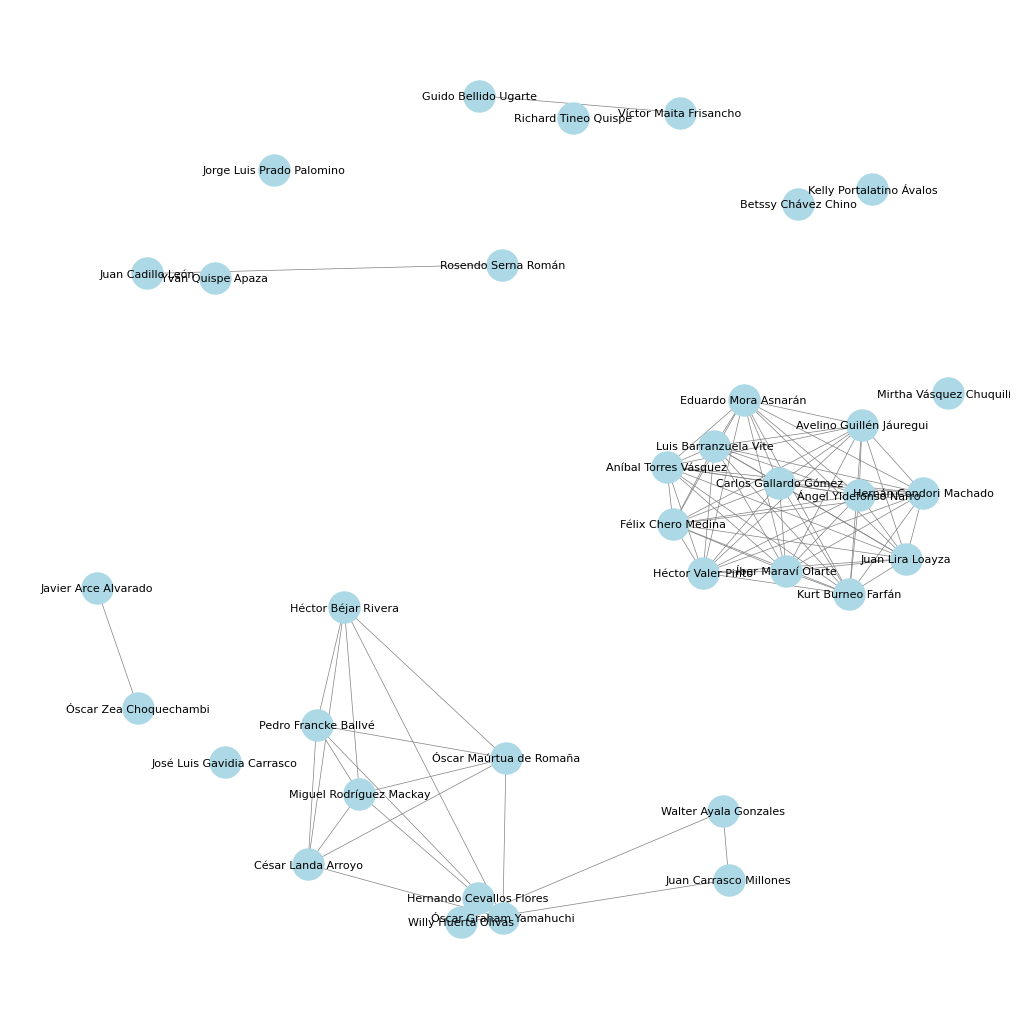

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    
    # Add the minister as a node with university as an attribute
    G.add_node(minister, university=university)
    
# Create edges based on shared universities
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['U_Pregrado'] == row2['U_Pregrado']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Draw the graph with improved layout
plt.figure(figsize=(10, 10))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, edge_color='gray', width=0.5)

plt.show()